In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
from src.data.preprocess.exploratory_data_analysis_helpers import compare
from src.data.preprocess.exploratory_data_analysis_helpers import find_most_common_nouns
from src.data.preprocess.exploratory_data_analysis_helpers import part_of_speech_frequency
from src.data.preprocess.exploratory_data_analysis_helpers import syntactic_dependency_frequency
from src.utils.misc import create_spacy_docs

data = pd.read_csv("../../data/external/hatespeech/clean_sexism_dataset.csv")

nlp = spacy.load("en_core_web_md")


In [2]:
data['docs'] = create_spacy_docs(data, "text")

In [3]:
misogynistic_docs = data.loc[data.loc[:,'label'] == 1, "docs"]
non_misogynistic_docs = data.loc[data.loc[:,'label'] == 0, "docs"]

misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(misogynistic_docs), columns=['noun', 'count'])
non_misogynistic_common_nouns = pd.DataFrame(find_most_common_nouns(non_misogynistic_docs), columns=['noun', 'count'])


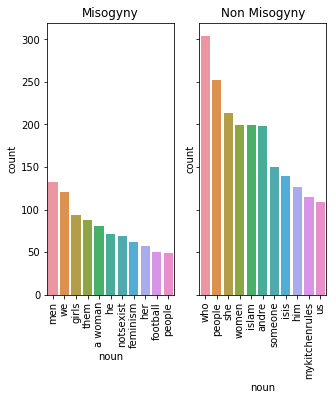

In [4]:
top_10_misogynistic = misogynistic_common_nouns.loc[10:20, :]
top_10_non_misogynistic = non_misogynistic_common_nouns.loc[10:20, :]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
misogynistic = sns.barplot(x=top_10_misogynistic['noun'], y=top_10_misogynistic['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic['noun'], y=top_10_non_misogynistic['count'], ax=ax[1])
ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")

def rotate_ticks(graph1, graph2):
    for item1, item2 in zip(graph1.get_xticklabels(), graph2.get_xticklabels()):
        item1.set_rotation(90)
        item2.set_rotation(90)

rotate_ticks(misogynistic,non_misogynistic)

plt.show()


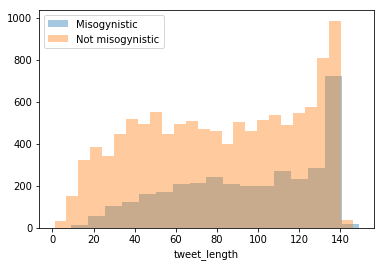

In [5]:
data['tweet_length'] = data["text"].apply(lambda tweet: len(tweet))
data.groupby('label').mean()['tweet_length']

sns.distplot(data.loc[data.loc[:,'label'] == 1, "tweet_length"], kde=False, label="Misogynistic")
sns.distplot(data.loc[data.loc[:,'label'] == 0, "tweet_length"], kde=False, label="Not misogynistic")

plt.legend();


KeyError: 'POS'

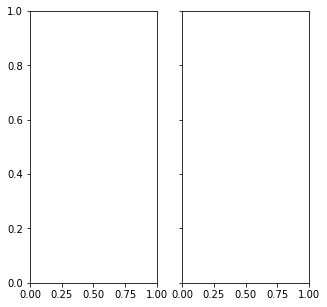

In [6]:
top_10_misogynistic_pos, top_10_non_misogynistic_pos = compare(part_of_speech_frequency, misogynistic_docs, non_misogynistic_docs)

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(5,5))
misogynistic = sns.barplot(x=top_10_misogynistic_pos[part_of_speech_frequency.__name__], y=top_10_misogynistic_pos['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic_pos[part_of_speech_frequency.__name__], y=top_10_non_misogynistic_pos['count'], ax=ax[1])

ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")


rotate_ticks(misogynistic, non_misogynistic)    

plt.show()

In [ ]:
top_10_misogynistic_dep, top_10_non_misogynistic_dep = compare(syntactic_dependency_frequency, misogynistic_docs, non_misogynistic_docs)

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
misogynistic = sns.barplot(x=top_10_misogynistic_dep[syntactic_dependency_frequency.__name__], y=top_10_misogynistic_dep['count'], ax=ax[0])
non_misogynistic = sns.barplot(x=top_10_non_misogynistic_dep[syntactic_dependency_frequency.__name__], y=top_10_non_misogynistic_dep['count'], ax=ax[1])

ax[0].set_title("Misogyny")
ax[1].set_title("Non Misogyny")

rotate_ticks(misogynistic, non_misogynistic)  
    

plt.show()


    
# edges = []
# for doc in misogyny_docs:
#     graph = load_deptree_into_graph(doc)
#     edges+=list(graph.edges)
#     
# df = pd.DataFrame(edges, columns = ['e1', 'e2'])
# nouns = df['e1'].to_list()
# frequencies = [(word, nouns.count(word)) for word in set(nouns)]
# sorted(set(frequencies), key=lambda x: x[1], reverse = True)
# df.loc[df.loc[:, "e1"] == "feminazi"]['e2']